In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
## Load our data
movies = pd.read_csv("./movies.csv")
ratings = pd.read_csv("./ratings.csv")

In [5]:
(movies.info() ,print("\n"), ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


(None, None, None)

In [10]:
print("movies shape : ",movies.shape)
print("ratings shape : ",ratings.shape)

movies shape :  (10329, 3)
ratings shape :  (105339, 4)


In [17]:
(movies.describe() , ratings.describe())

(             movieId
 count   10329.000000
 mean    31924.282893
 std     37734.741149
 min         1.000000
 25%      3240.000000
 50%      7088.000000
 75%     59900.000000
 max    149532.000000,
               userId        movieId         rating     timestamp
 count  105339.000000  105339.000000  105339.000000  1.053390e+05
 mean      364.924539   13381.312477       3.516850  1.130424e+09
 std       197.486905   26170.456869       1.044872  1.802660e+08
 min         1.000000       1.000000       0.500000  8.285650e+08
 25%       192.000000    1073.000000       3.000000  9.711008e+08
 50%       383.000000    2497.000000       3.500000  1.115154e+09
 75%       557.000000    5991.000000       4.000000  1.275496e+09
 max       668.000000  149532.000000       5.000000  1.452405e+09)

In [20]:
genres = []
for genre in movies.genres:

  x = genre.split("|")
  for i in x:
    if i not in genres:
      genres.append(str(i))
genres = str(genres)
movie_title = []
for title in movies.title :
  movie_title.append(title[0:-7])
movie_title = str(movie_title)

### Data visualization

In [22]:
wordcloud_genre = WordCloud(width= 1500 ,height= 800 , background_color="green", min_font_size = 1.5, min_word_length=2.5).generate(genres)
wordcloud_title = WordCloud(width= 1500 ,height= 800 , background_color="cyan", min_font_size = 1.5, min_word_length=2.5).generate(movie_title)

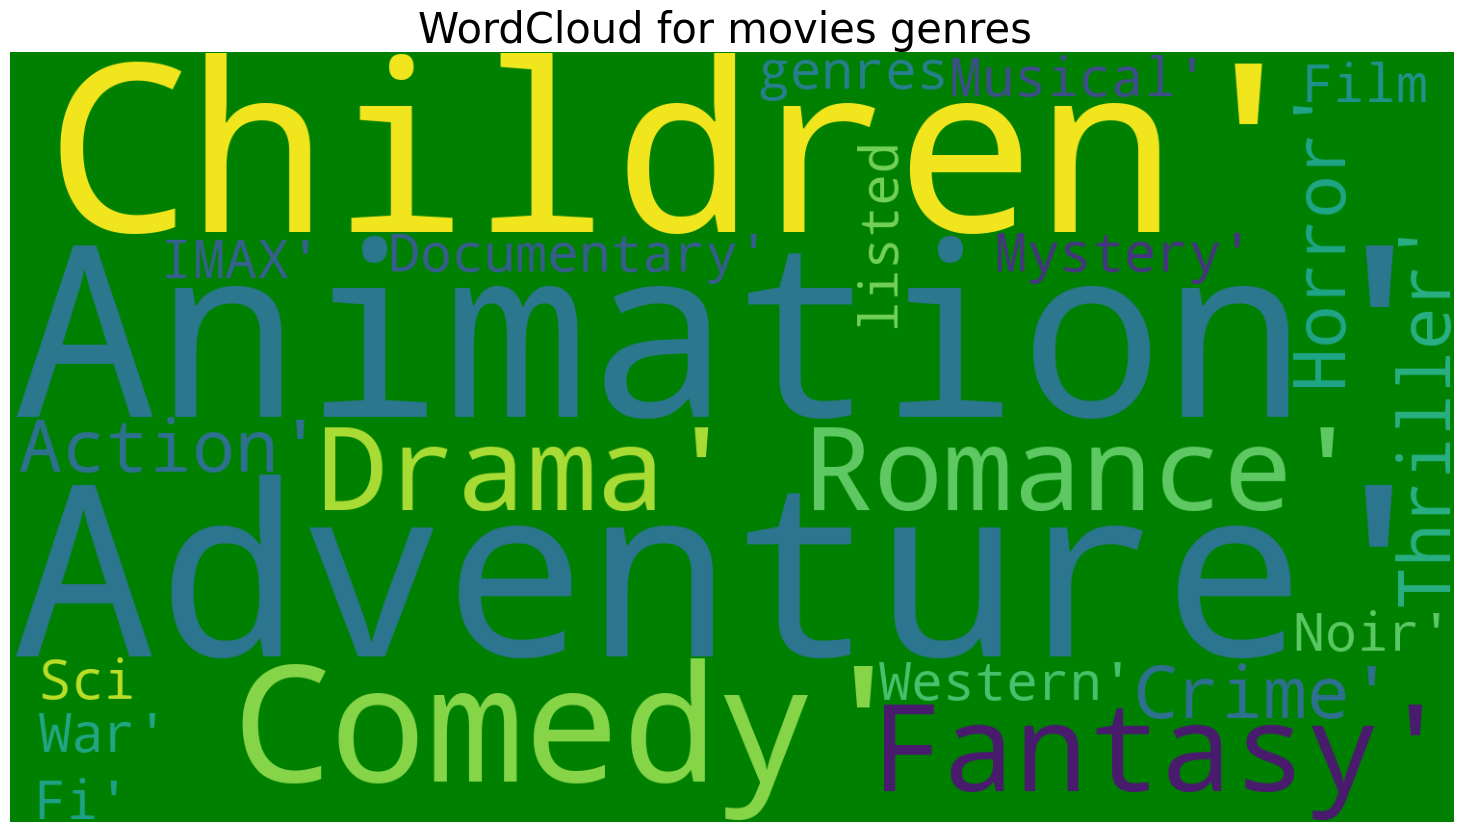

In [24]:
plt.figure(figsize=(30,10))
plt.axis("off")
plt.title("WordCloud for movies genres ", fontsize= 30)
plt.imshow(wordcloud_genre)

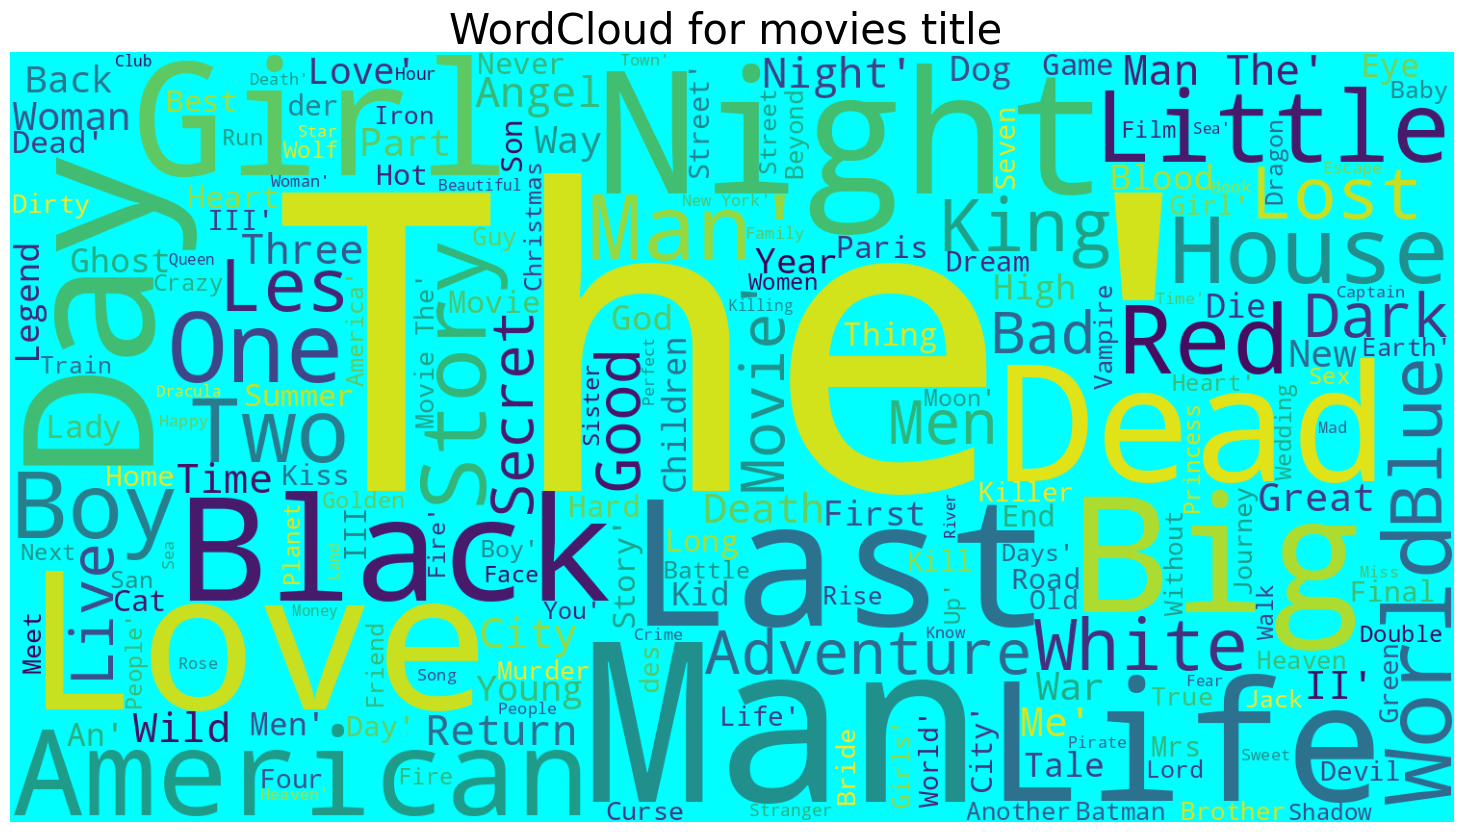

In [25]:
plt.figure(figsize=(30,10))
plt.axis("off")
plt.title("WordCloud for movies title ", fontsize= 30)
plt.imshow(wordcloud_title)

In [26]:
df = pd.merge(ratings, movies , how="left",on="movieId")
(df.head() , df.tail())

(   userId  movieId  rating   timestamp  \
 0       1       16     4.0  1217897793   
 1       1       24     1.5  1217895807   
 2       1       32     4.0  1217896246   
 3       1       47     4.0  1217896556   
 4       1       50     4.0  1217896523   
 
                                        title                   genres  
 0                              Casino (1995)              Crime|Drama  
 1                              Powder (1995)             Drama|Sci-Fi  
 2  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  Mystery|Sci-Fi|Thriller  
 3                Seven (a.k.a. Se7en) (1995)         Mystery|Thriller  
 4                 Usual Suspects, The (1995)   Crime|Mystery|Thriller  ,
         userId  movieId  rating   timestamp                   title  \
 105334     668   142488     4.0  1451535844        Spotlight (2015)   
 105335     668   142507     3.5  1451535889   Pawn Sacrifice (2015)   
 105336     668   143385     4.0  1446388585  Bridge of Spies (2015)   
 105337     6

In [28]:
df1 = df.groupby(["title"])[["rating"]].sum()
high_rated  = df1.nlargest(26, "rating")
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 26 artists>

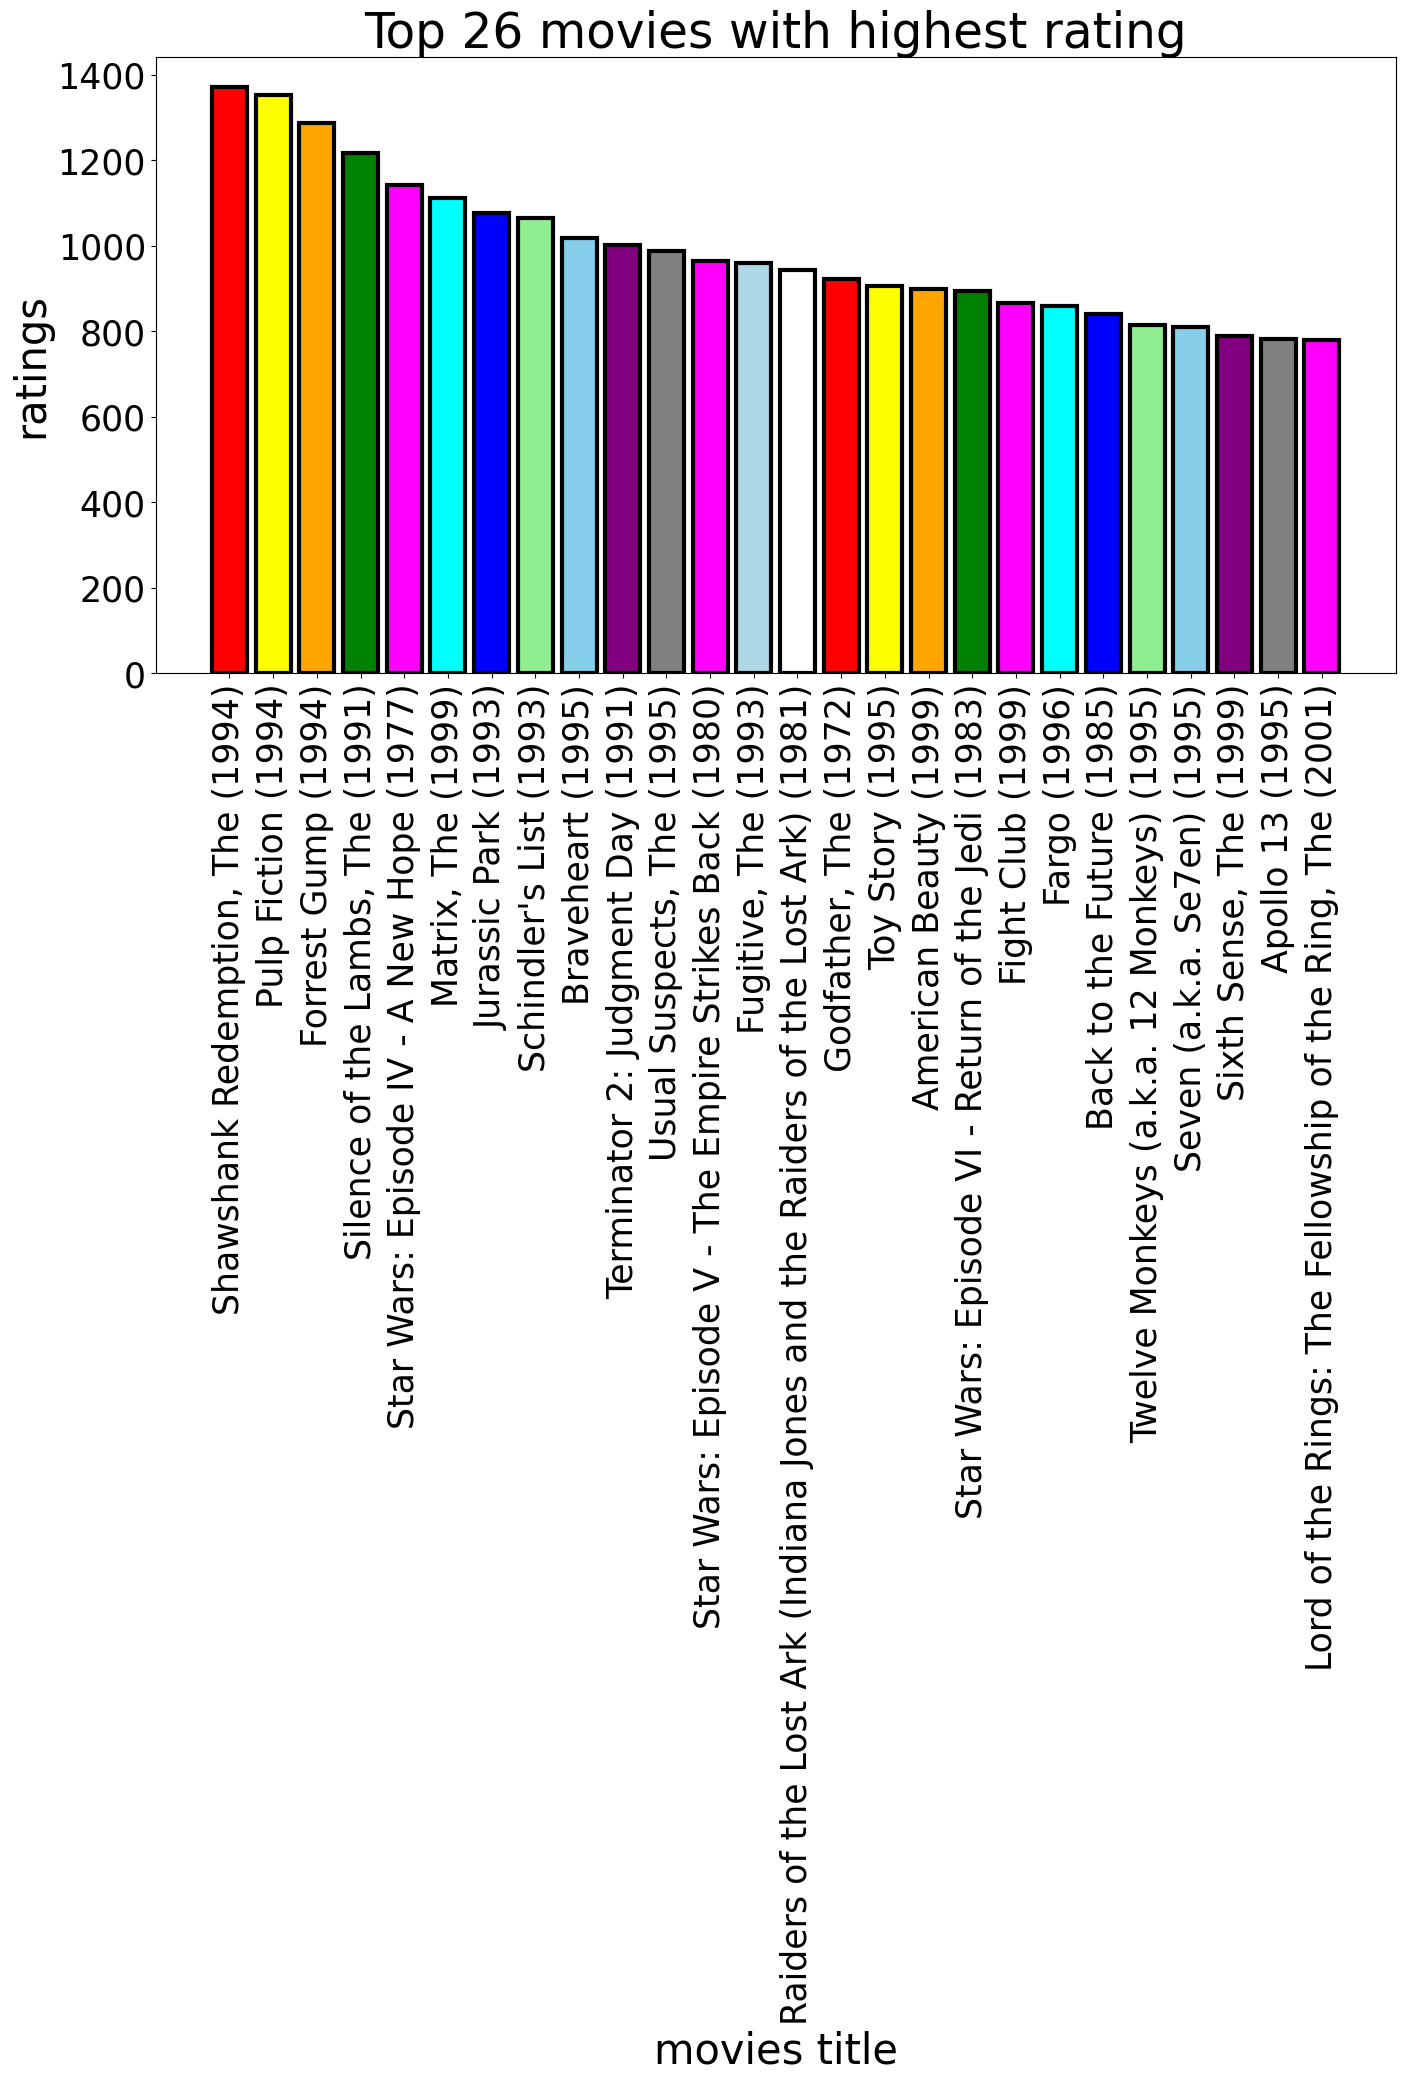

In [32]:
plt.figure(figsize = (16,8))
plt.title("Top 26 movies with highest rating" , fontsize =35)
colors = ['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple',"gray","magenta","lightblue","white"]
plt.ylabel("ratings",fontsize=30)
plt.xticks(fontsize=25, rotation=90)
plt.xlabel("movies title",fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated["rating"],linewidth=3,edgecolor="black",color=colors)

In [34]:
df2 = df.groupby(["title"])[["rating"]].count()
rating_count_26  = df2.nlargest(26, "rating")
rating_count_26.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 26 artists>

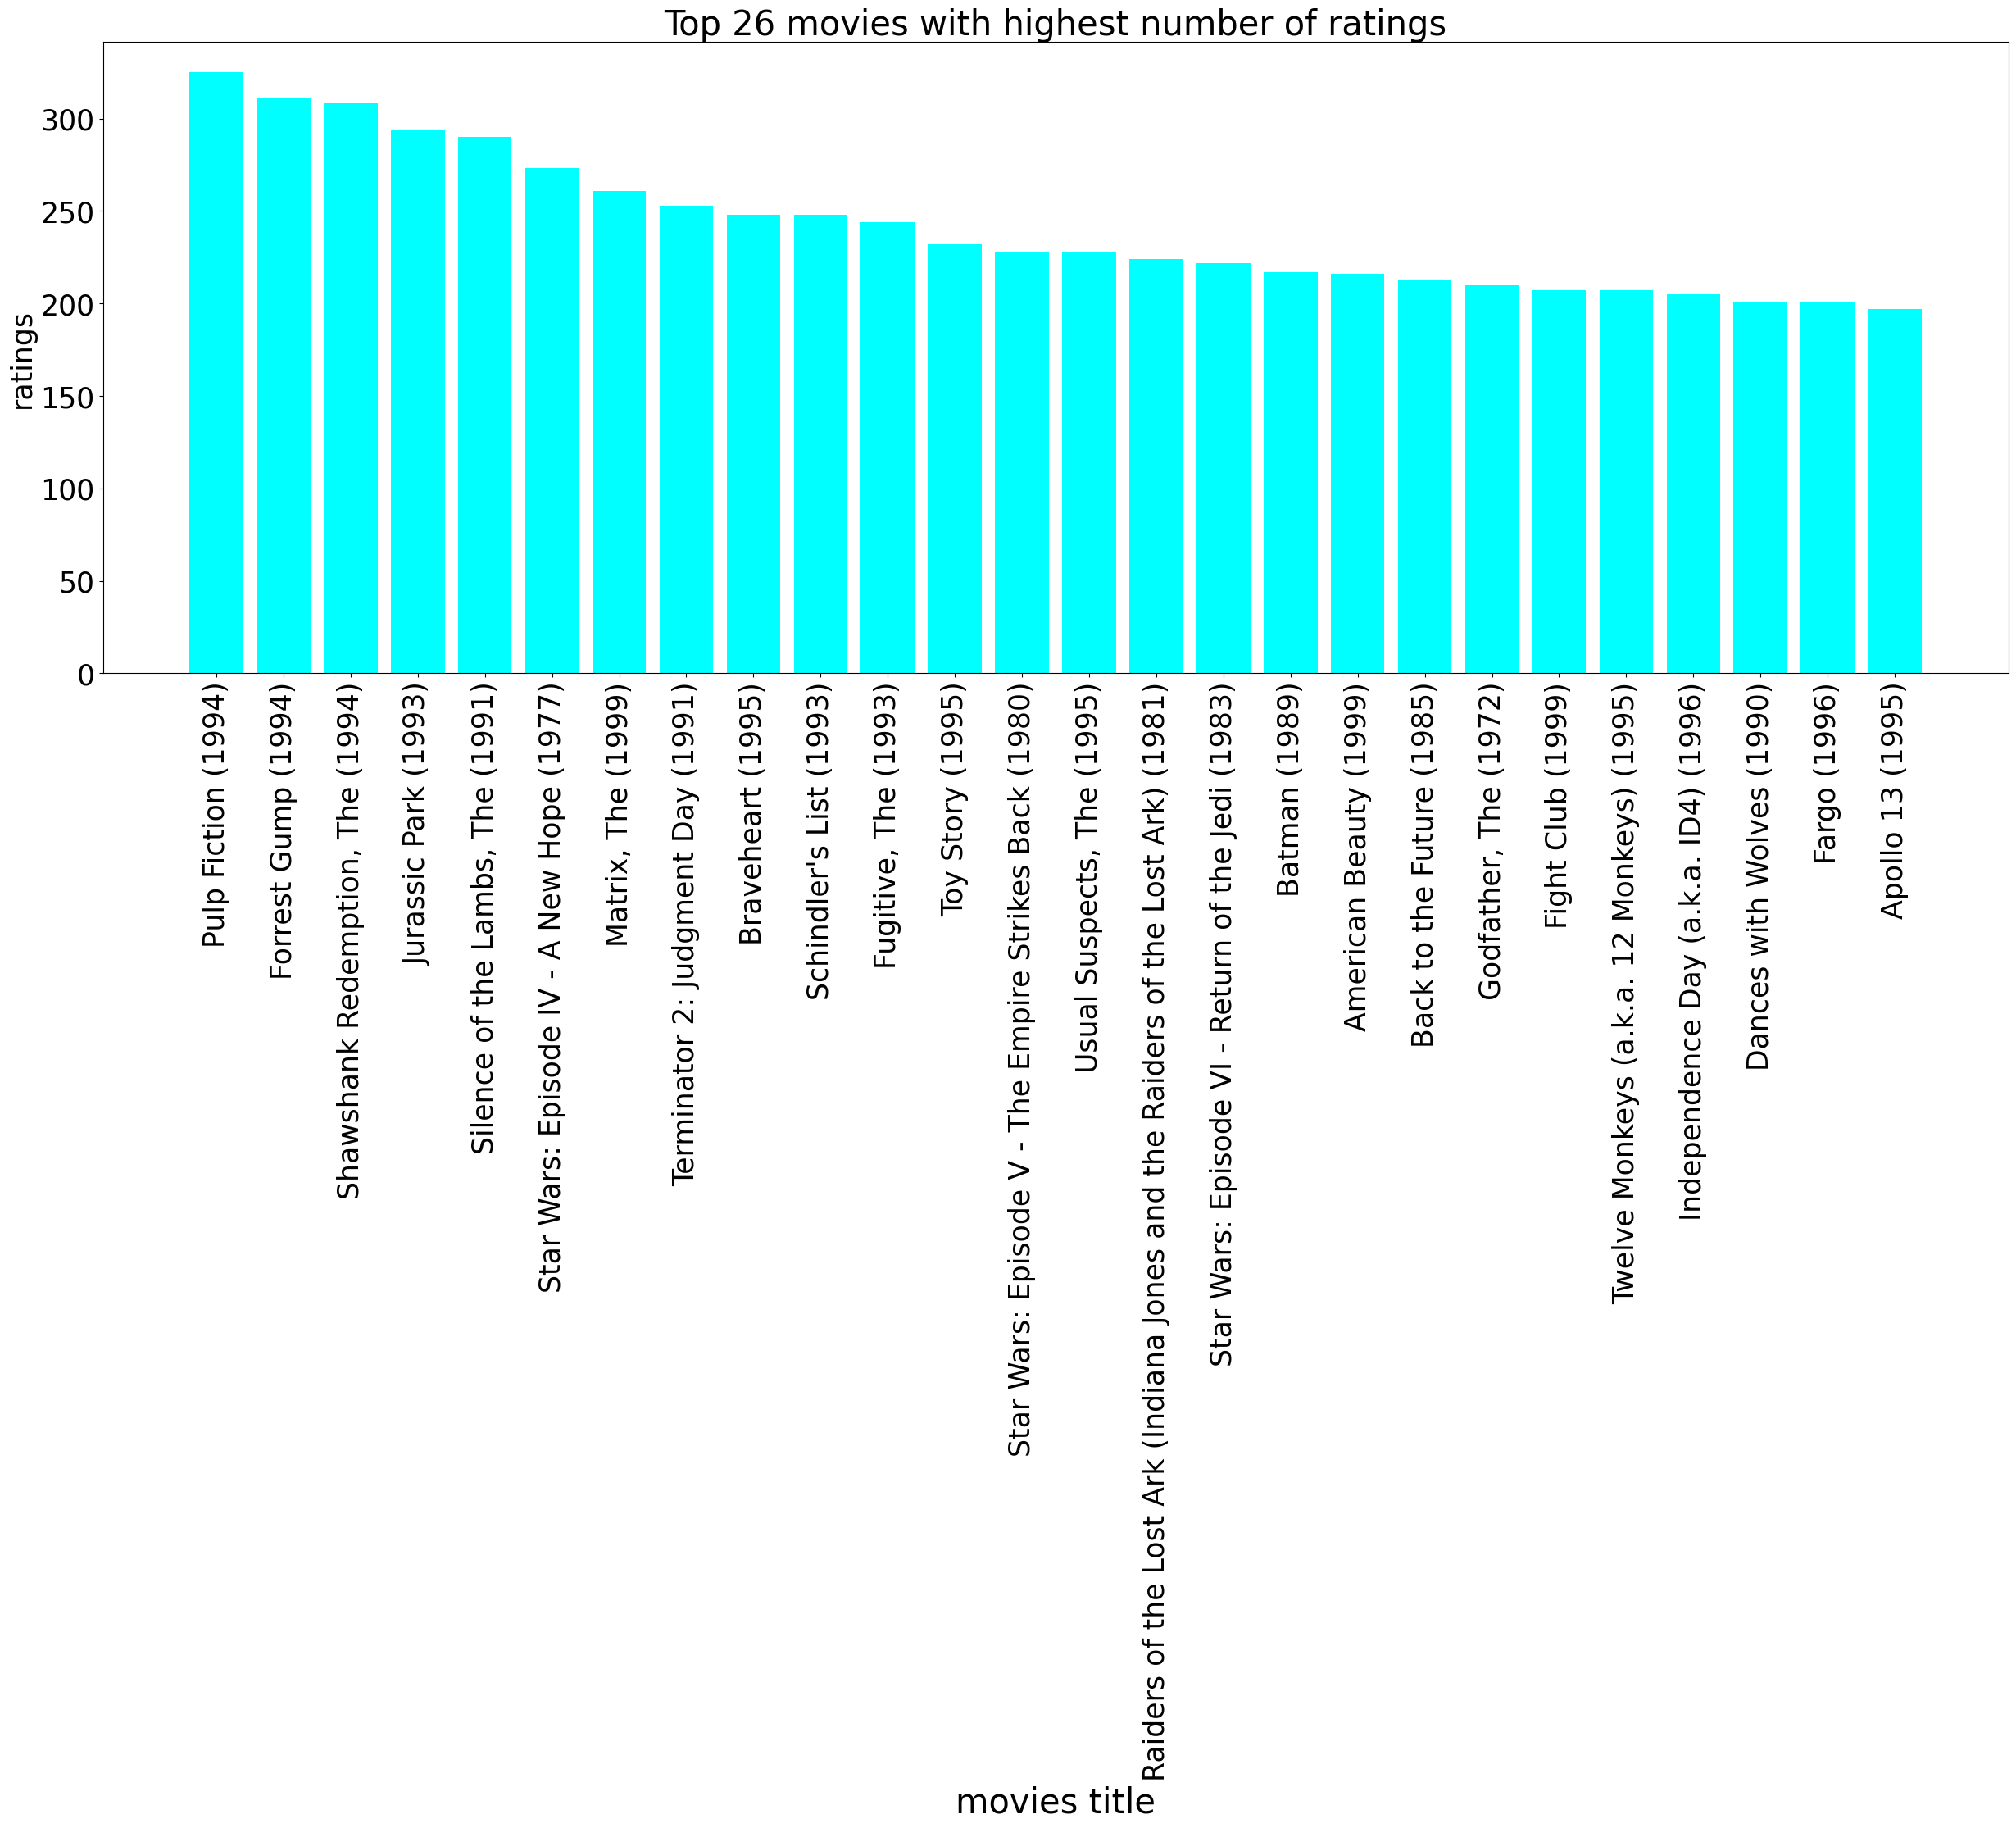

In [36]:
plt.figure(figsize=(30,10))
plt.title("Top 26 movies with highest number of ratings", fontsize=30)
plt.xticks(fontsize=25, rotation = 90)
plt.yticks(fontsize=25)
plt.xlabel("movies title",fontsize=30)
plt.ylabel("ratings",fontsize= 25)

plt.bar(rating_count_26.index,rating_count_26.rating, color='cyan')

In [38]:
cv = TfidfVectorizer()
tfidf_matrix = cv.fit_transform(movies["genres"])

In [40]:
movie_user = df.pivot_table(index="userId",columns="title",values="rating")

movie_user.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,2.5,NaN,NaN,NaN,2.0,NaN,3.0,2.5,...,NaN,1.5,0.5,NaN,2.0,NaN,3.5,NaN,2.0,3.0


Now let's suppose that a certain user want to watch a movie similar to Toy Story (1995) then we can recommend the user by cac the cosinne similarity between toy story and other movies. So we have to first find the cosine similarity between

In [41]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [48]:
indices = pd.Series(movies.index, index=movies["title"])
titles =  movies["title"]

def recommendations(title):
  idx = indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores , key=lambda x: x[1] , reverse=True)
  sim_scores = sim_scores[1:41]
  movies_indices  = [i[0] for i in sim_scores]
  return titles.iloc[movies_indices]

In [52]:
recommendations("xXx (2002)")[:2]

22                      Assassins (1995)
141    Die Hard: With a Vengeance (1995)
Name: title, dtype: object